In [1]:
# TODO:
# Choose a suitable value of repcnt
# Replace ALL simulator lines with functions for running on hardware (to be done on Qbraid)

import cirq
import numpy as np
import matplotlib.pyplot as plt

def prep(sys,state):
    for i in range(len(state)):
        if state[i]=='1':
            yield cirq.X(sys[i])

def zz_pump(sys,env,p,state):
    yield from prep(sys,state)
    yield cirq.CNOT(sys[1],sys[0])
    yield cirq.X(env[0])
    yield cirq.CNOT(sys[0],env[0])
    yield cirq.Rx(rads=np.arccos(1-2*p)).on(sys[0]).controlled_by(env[0])
    yield cirq.CNOT(sys[0],env[0])
    yield cirq.H(sys[1])
    yield cirq.measure(sys,key = 'zz'+state)

def xx_pump(sys,env,p,state):
    yield from prep(sys,state)
    yield cirq.CNOT(sys[1],sys[0])
    yield cirq.H(sys[1])
    yield cirq.X(env[0])
    yield cirq.CNOT(sys[1],env[0])
    yield cirq.Rx(rads=np.arccos(1-2*p)).on(sys[1]).controlled_by(env[0])
    yield cirq.CNOT(sys[1],env[0])
    yield cirq.measure(sys,key = 'xx'+state)

def zz_xx_pump(sys,env,p,state):
    yield from prep(sys,state)
    yield cirq.CNOT(sys[1],sys[0])
    yield cirq.X(env[0])
    yield cirq.CNOT(sys[0],env[0])
    yield cirq.Rx(rads=np.arccos(1-2*p)).on(sys[0]).controlled_by(env[0])
    yield cirq.CNOT(sys[0],env[0])
    yield cirq.H(sys[1])
    yield cirq.X(env[1])
    yield cirq.CNOT(sys[1],env[1])
    yield cirq.Rx(rads=np.arccos(1-2*p)).on(sys[1]).controlled_by(env[1])
    yield cirq.CNOT(sys[1],env[1])
    yield cirq.measure(sys,key = 'zzxx'+state)

In [2]:
probs = np.linspace(0,1,num=5)
repcnt = 256

In [3]:
!qbraid jobs enable qbraid_sdk

You have already enabled qBraid Quantum Jobs in the qbraid_sdk environment.


In [4]:
from qbraid import get_devices
get_devices()

Provider,Name,qBraid ID,Status
AWS,DM1,aws_dm_sim,●
AWS,SV1,aws_sv_sim,●
AWS,TN1,aws_tn_sim,●
IBM,Belem,ibm_q_belem,●
IBM,Ext. stabilizer simulator,ibm_q_ext_stabilizer_sim,●
IBM,Jakarta,ibm_q_jakarta,●
IBM,Lagos,ibm_q_lagos,●
IBM,Lima,ibm_q_lima,●
IBM,MPS simulator,ibm_q_mps_sim,●
IBM,Manila,ibm_q_manila,●


In [45]:
import qbraid
from qbraid import device_wrapper, job_wrapper, get_jobs
# from qbraid import verify_config

qbraid_device = device_wrapper("aws_dm_sim")
qbraid_device.info

AttributeError: module 'lib' has no attribute 'OpenSSL_add_all_algorithms'

In [46]:
help(device_wrapper)

Help on function device_wrapper in module qbraid.wrappers:

device_wrapper(qbraid_device_id: str)
    Apply qbraid device wrapper to device from a supported device provider.
    
    Args:
        qbraid_device_id: unique ID specifying a supported quantum hardware device/simulator
    
    Returns:
        :class:`~qbraid.devices.DeviceLikeWrapper`: A wrapped quantum device-like object
    
    Raises:
        :class:`~qbraid.QbraidError`: If ``qbraid_id`` is not a valid device reference.



In [44]:
# # help(qbraid)
# print(dir(qbraid.exceptions))

['PackageValueError', 'ProgramTypeError', 'QPROGRAM_LIBS', 'QbraidError', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__']


In [15]:
qbraid.api.verify_config("AWS")

AttributeError: module 'qbraid.api' has no attribute 'verify_config'

In [ ]:
ionq_id = "aws_ionq"
qbraid_aws_device = device_wrapper(ionq_id)
qbraid_aws_device.vendor_dlo

In [2]:
def batch_1(p):
    env = [cirq.LineQubit(0),cirq.LineQubit(1),cirq.LineQubit(4),cirq.LineQubit(5),cirq.LineQubit(8)]
    sys = [cirq.LineQubit(2),cirq.LineQubit(3),cirq.LineQubit(6),cirq.LineQubit(7),cirq.LineQubit(9),cirq.LineQubit(10)]
    circ = cirq.Circuit()
    circ.append(zz_xx_pump(sys[0:2],env[0:2],p,'00'))
    circ.append(zz_xx_pump(sys[2:4],env[2:4],p,'01'))
    circ.append(zz_pump(sys[4:6],env[4:5],p,'00'))
    simulator = cirq.Simulator()
    results = simulator.run(circ,repetitions=repcnt)
    hist1 = results.histogram(key='zzxx00')
    hist2 = results.histogram(key='zzxx01')
    hist3 = results.histogram(key='zz00')
    return hist1,hist2,hist3

def batch_2(p):
    env = [cirq.LineQubit(0),cirq.LineQubit(1),cirq.LineQubit(4),cirq.LineQubit(5),cirq.LineQubit(8)]
    sys = [cirq.LineQubit(2),cirq.LineQubit(3),cirq.LineQubit(6),cirq.LineQubit(7),cirq.LineQubit(9),cirq.LineQubit(10)]
    circ = cirq.Circuit()
    circ.append(zz_xx_pump(sys[0:2],env[0:2],p,'10'))
    circ.append(zz_xx_pump(sys[2:4],env[2:4],p,'11'))
    circ.append(zz_pump(sys[4:6],env[4:5],p,'01'))
    simulator = cirq.Simulator()
    results = simulator.run(circ,repetitions=repcnt)
    hist1 = results.histogram(key='zzxx10')
    hist2 = results.histogram(key='zzxx11')
    hist3 = results.histogram(key='zz01')
    return hist1,hist2,hist3

def batch_3(p):
    env = [cirq.LineQubit(0),cirq.LineQubit(3),cirq.LineQubit(6)]
    sys = [cirq.LineQubit(1),cirq.LineQubit(2),cirq.LineQubit(4),cirq.LineQubit(5),cirq.LineQubit(7),cirq.LineQubit(8)]
    circ = cirq.Circuit()
    circ.append(zz_pump(sys[0:2],env[0:1],p,'10'))
    circ.append(zz_pump(sys[2:4],env[1:2],p,'11'))
    circ.append(xx_pump(sys[4:6],env[2:3],p,'00'))
    simulator = cirq.Simulator()
    results = simulator.run(circ,repetitions=repcnt)
    hist1 = results.histogram(key='zz10')
    hist2 = results.histogram(key='zz11')
    hist3 = results.histogram(key='xx00')
    return hist1,hist2,hist3

def batch_4(p):
    env = [cirq.LineQubit(0),cirq.LineQubit(3),cirq.LineQubit(6)]
    sys = [cirq.LineQubit(1),cirq.LineQubit(2),cirq.LineQubit(4),cirq.LineQubit(5),cirq.LineQubit(7),cirq.LineQubit(8)]
    circ = cirq.Circuit()
    circ.append(xx_pump(sys[0:2],env[0:1],p,'01'))
    circ.append(xx_pump(sys[2:4],env[1:2],p,'10'))
    circ.append(xx_pump(sys[4:6],env[2:3],p,'11'))
    simulator = cirq.Simulator()
    results = simulator.run(circ,repetitions=repcnt)
    hist1 = results.histogram(key='xx01')
    hist2 = results.histogram(key='xx10')
    hist3 = results.histogram(key='xx11')
    return hist1,hist2,hist3

In [3]:
def get_results(p):
    hists1 = batch_1(p)
    hists2 = batch_2(p)
    hists3 = batch_3(p)
    hists4 = batch_4(p)
    final_hist_zzxx = (hists1[0]+hists1[1]+hists2[0]+hists2[1])
    for x in final_hist_zzxx:
        final_hist_zzxx[x]/=(4*repcnt)
    final_hist_zz = (hists1[2]+hists2[2]+hists3[0]+hists3[1])
    for x in final_hist_zz:
        final_hist_zz[x]/=(4*repcnt)
    final_hist_xx = (hists3[2]+hists4[0]+hists4[1]+hists4[2])
    for x in final_hist_xx:
        final_hist_xx[x]/=(4*repcnt)
    return final_hist_zzxx,final_hist_zz,final_hist_xx

In [4]:
hists_p = [get_results(p) for p in probs] #[zzxx,zz,xx]

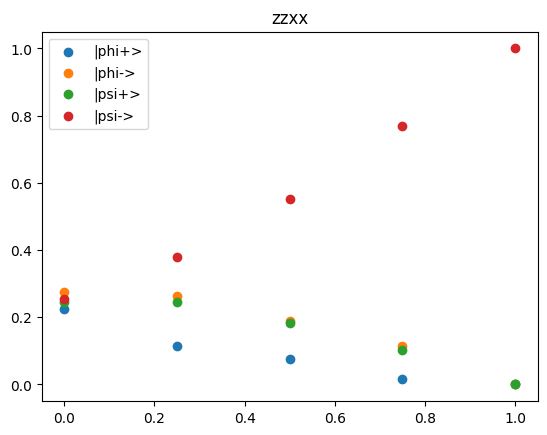

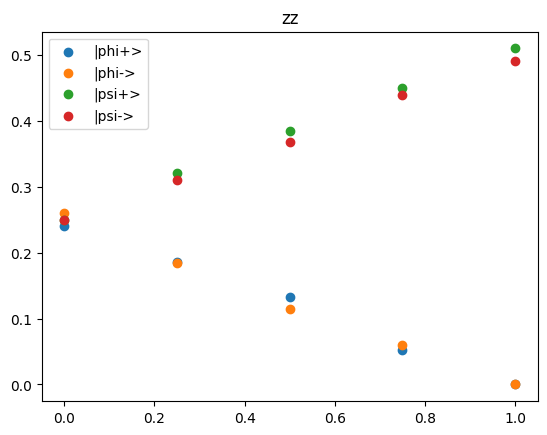

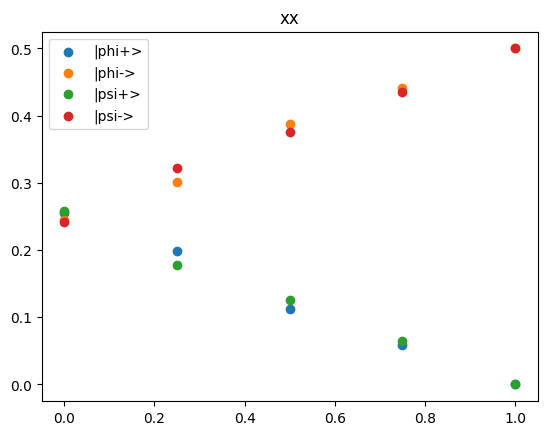

In [5]:
plt_titles = ['zzxx','zz','xx']
for j in range(3): #loop over pump
    pops = [[],[],[],[]]
    for i in range(4): #loop over bell state
        for counts in hists_p:
            pops[i].append(counts[j][i])
    plt.title(plt_titles[j])
    plt.scatter(probs,pops[0],label='|phi+>')
    plt.scatter(probs,pops[1],label='|phi->')
    plt.scatter(probs,pops[2],label='|psi+>')
    plt.scatter(probs,pops[3],label='|psi->')
    plt.legend()
    plt.show()